In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('car_data.csv')

In [3]:
data.head(10)

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN
5,0,25000,AZN,Bakı,Mercedes,E 200,2007,Sedan,Gümüşü,1.8 L/184 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1141,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Almaniyadan yeni gelib. Ideal veziyy...,NaN,Avropa,NaN,NaN
6,0,27900,AZN,Bakı,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,1.5 L/170 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,128,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Azerbaycana yeni gelib hec bir xerc teleb etmi...,1,Amerika,5,NaN
7,0,13400,AZN,Bakı,Opel,Astra,2009,Hetçbek,Boz,1.4 L/90 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1282,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",Almanyadan yeni gelib Gömrük olnub nömre alnib...,NaN,NaN,NaN,NaN
8,0,26500,USD,Bakı,BMW,520,2016,Sedan,Göy,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,9807,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin idial veziyyetdedi hec bir prablemi yoxd...,NaN,Koreya,5,NaN
9,0,13500,AZN,Bakı,Chevrolet,Cruze,2012,Sedan,Ağ,1.6 L/124 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,6478,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",MAŞIN ÇOX TƏCİLİ SATILIR!!! Maşın rəsmi servis...,1,Rəsmi diler,4,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [5]:
data.describe()

,Avtosalon,Qiymet,Buraxılış ili,Baxışların sayı
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.25370,27318.521400,2010.067900,4328.818800
std,0.43515,28995.789851,8.386246,13383.511716
min,0.00000,1100.000000,1938.000000,41.000000
25%,0.00000,12700.000000,2006.000000,408.750000
50%,0.00000,21000.000000,2011.000000,1164.500000
75%,1.00000,32500.000000,2015.000000,3500.250000
max,1.00000,850000.000000,2023.000000,334547.000000


In [6]:
data.shape

(10000, 23)

Data Cleaning and Preprocessing

In [7]:
data.isnull().sum()

,0
Avtosalon,0
Qiymet,0
Valyuta,0
Şəhər,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0


In [8]:
data = data.drop(columns = ['Qəzalı', 'Yeniləndi', 'Yeni', 'Baxışların sayı', 'Avtosalon', 'Hansı bazar üçün yığılıb','Etrafli','Sahiblər','Şəhər'])

In [9]:
data.columns

Index(['Qiymet', 'Valyuta', 'Marka', 'Model', 'Buraxılış ili', 'Ban növü',
       'Rəng', 'Mühərrik', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti',
       'Extra', 'Yerlərin sayı'],
      dtype='object')

In [10]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [11]:
data['Vəziyyəti'].value_counts()

,count
Vəziyyəti,
"Vuruğu yoxdur, rənglənməyib",9157
"Vuruğu yoxdur, rənglənib",696
"Vuruğu var, rənglənib",73
"Vuruğu var, rənglənməyib",46


In [12]:
data=data.dropna(subset=["Vəziyyəti"])

In [13]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [14]:
data['Yerlərin sayı'].value_counts()

,count
Yerlərin sayı,
5,4372
7,1193
4,831
3,187
2,115
8+,74
6,40
1,19


In [15]:
# Fill missing values with the mode (most frequent value: '5')
data["Yerlərin sayı"].fillna("5", inplace=True)

data["Yerlərin sayı"] = data["Yerlərin sayı"].replace("8+", "8")
data["Yerlərin sayı"] = data["Yerlərin sayı"].astype(int)


<ipython-input-15-1c56eec9e67a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Yerlərin sayı"].fillna("5", inplace=True)
<ipython-input-15-1c56eec9e67a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Yerlərin sayı"].fillna("5", inplace=True)
<ipython-input-15-1c56eec9e67a>:4: SettingWithCopyWarning: 
A value is trying to be set

In [16]:
data["Extra"].value_counts()

,count
Extra,
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",1827
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Oturacaqların ventilyasiyası",391
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr",338
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",324
"Yüngül lehimli disklər, ABS, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",324
...,...
"Lyuk, Mərkəzi qapanma, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Oturacaqların ventilyasiyası",1
"Yüngül lehimli disklər, ABS, Yağış sensoru, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",1
"ABS, Mərkəzi qapanma, Oturacaqların isidilməsi, Ksenon lampalar",1


In [17]:
data['Extra'].isna().sum()

np.int64(762)

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

extras_non_null = data['Extra'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

mlb = MultiLabelBinarizer()
extras_encoded = pd.DataFrame(mlb.fit_transform(extras_non_null), columns=mlb.classes_, index=extras_non_null.index)

data = data.join(extras_encoded)


In [19]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [20]:
data.shape

(9972, 27)

In [21]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Qiymet                        9972 non-null   int64  
 1   Valyuta                       9972 non-null   object 
 2   Marka                         9972 non-null   object 
 3   Model                         9972 non-null   object 
 4   Buraxılış ili                 9972 non-null   int64  
 5   Ban növü                      9972 non-null   object 
 6   Rəng                          9972 non-null   object 
 7   Mühərrik                      9972 non-null   object 
 8   Yürüş                         9972 non-null   object 
 9   Sürətlər qutusu               9972 non-null   object 
 10  Ötürücü                       9972 non-null   object 
 11  Vəziyyəti                     9972 non-null   object 
 12  Extra                         9210 non-null   object 
 13  Yerlərin

In [23]:
data['Mühərrik'].value_counts()

,count
Mühərrik,
2.0 L/184 a.g./Dizel,502
1.6 L/75 a.g./Benzin,320
2.0 L/245 a.g./Benzin,264
1.5 L/76 a.g./Hibrid,180
1.4 L/90 a.g./Benzin,169
...,...
3.3 L/242 a.g./Benzin,1
3.0 L/170 a.g./Dizel,1
3.5 L/250 a.g./Benzin,1


In [24]:
# Split only engine volume and fuel type
data[["Motor_Hecmi", "Yanacaq_Novu"]] = data["Mühərrik"].str.extract(r"(\d+\.\d+)\s*L/\d+\s*a\.g\./(.+)")

data["Motor_Hecmi"] = data["Motor_Hecmi"].astype(float)
data["Yanacaq_Novu"] = data["Yanacaq_Novu"].str.strip()

data.drop(columns=["Mühərrik"], inplace=True)

In [25]:
data.head(20)

,Qiymet,Valyuta,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,...,Lyuk,Mərkəzi qapanma,Oturacaqların isidilməsi,Oturacaqların ventilyasiyası,Park radarı,Yan pərdələr,Yağış sensoru,Yüngül lehimli disklər,Motor_Hecmi,Yanacaq_Novu
0,13500,AZN,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.6,Benzin
1,23500,USD,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.8,Hibrid
2,33200,AZN,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Dizel
3,17000,AZN,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.5,Benzin
4,36000,USD,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,Benzin
5,25000,AZN,Mercedes,E 200,2007,Sedan,Gümüşü,204 000 km,Avtomat,Arxa,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.8,Benzin
6,27900,AZN,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,45 000 km,Avtomat,Tam,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,Benzin
7,13400,AZN,Opel,Astra,2009,Hetçbek,Boz,153 896 km,Mexaniki,Ön,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.4,Benzin
8,26500,USD,BMW,520,2016,Sedan,Göy,135 000 km,Avtomat,Arxa,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Dizel
9,13500,AZN,Chevrolet,Cruze,2012,Sedan,Ağ,150 000 km,Avtomat,Ön,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.6,Benzin


In [26]:
def convert_usd_to_azn(data, rate=1.7):

    data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate

    data.drop(columns=["Valyuta"], inplace=True)

    return data

data = convert_usd_to_azn(data)


<ipython-input-26-ef64550508c0>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 39950.  61200.  45050. ...  51000.  38930. 166600.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate


In [27]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,...,Lyuk,Mərkəzi qapanma,Oturacaqların isidilməsi,Oturacaqların ventilyasiyası,Park radarı,Yan pərdələr,Yağış sensoru,Yüngül lehimli disklər,Motor_Hecmi,Yanacaq_Novu
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.6,Benzin
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.8,Hibrid
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Dizel
3,17000.0,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.5,Benzin
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,100 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,Benzin
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,84 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,Benzin
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,299 785 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.6,Benzin
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,181 500 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,Dizel


In [28]:
data["Brand_Model"] = data["Marka"] + " " + data["Model"]

data.drop(columns=["Marka", "Model"], inplace=True)

In [30]:
import re

def clean_yurus(value):
    if pd.isna(value):
        return np.nan
    text = str(value).lower().strip()

    text = text.replace("km", "").replace(" ", "")

    if 'min' in text:

        numbers = re.findall(r"[\d\.]+", text)
        if numbers:
            try:
                num = float(numbers[0].replace(',', '.'))
                return num * 1000
            except:
                return np.nan
        else:
            return np.nan
    else:

        try:
            return float(text.replace(',', '.'))
        except:
            return np.nan

data["Yurus_Clean"] = data["Yürüş"].apply(clean_yurus)
print(data[["Yürüş", "Yurus_Clean"]].sample(10))



           Yürüş  Yurus_Clean
4838  126 900 km     126900.0
3494   81 000 km      81000.0
4893  124 500 km     124500.0
9486   28 600 km      28600.0
7452  109 000 km     109000.0
4272  157 716 km     157716.0
3158   90 000 km      90000.0
1813  368 000 km     368000.0
4476  228 000 km     228000.0
6279  260 000 km     260000.0


In [31]:
data.drop(columns=["Yürüş"], inplace=True)
data.rename(columns={"Yurus_Clean": "Yürüş"}, inplace=True)

In [33]:
# Motor_Hecmi üçün qrup medianı ilə doldur, sonra ümumi medianla doldur
data["Motor_Hecmi"] = data.groupby("Brand_Model")["Motor_Hecmi"].transform(lambda x: x.fillna(x.median()))
median_val = data["Motor_Hecmi"].median()
data["Motor_Hecmi"].fillna(median_val, inplace=True)

# Yanacaq_Novu üçün qrupun ən çox təkrarlanan (mode) dəyəri ilə doldur, əgər yoxdursa "unknown"
def fill_mode(series):
    if series.mode().empty:
        return series.fillna("unknown")
    else:
        return series.fillna(series.mode()[0])

data["Yanacaq_Novu"] = data.groupby("Brand_Model")["Yanacaq_Novu"].transform(fill_mode)

# Yanacaq_Novu üçün yenə də qalan boşluqları "unknown" ilə doldur
data["Yanacaq_Novu"].fillna("unknown", inplace=True)


<ipython-input-33-7f7b6e429545>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Motor_Hecmi"].fillna(median_val, inplace=True)
<ipython-input-33-7f7b6e429545>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [34]:
data.isnull().sum()

,0
Qiymet,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Sürətlər qutusu,0
Ötürücü,0
Vəziyyəti,0
Extra,762
Yerlərin sayı,0
ABS,762


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Qiymet                        9972 non-null   float64
 1   Buraxılış ili                 9972 non-null   int64  
 2   Ban növü                      9972 non-null   object 
 3   Rəng                          9972 non-null   object 
 4   Sürətlər qutusu               9972 non-null   object 
 5   Ötürücü                       9972 non-null   object 
 6   Vəziyyəti                     9972 non-null   object 
 7   Extra                         9210 non-null   object 
 8   Yerlərin sayı                 9972 non-null   int64  
 9   ABS                           9210 non-null   float64
 10  Arxa görüntü kamerası         9210 non-null   float64
 11  Dəri salon                    9210 non-null   float64
 12  Kondisioner                   9210 non-null   float64
 13  Ksenon l

Correlation with Qiymet:
 Qiymet                          1.000000
Buraxılış ili                   0.434668
Motor_Hecmi                     0.366831
Dəri salon                      0.326373
Oturacaqların isidilməsi        0.319781
Arxa görüntü kamerası           0.317175
Oturacaqların ventilyasiyası    0.306767
Park radarı                     0.302236
Lyuk                            0.300810
Ksenon lampalar                 0.271537
Yağış sensoru                   0.266279
Kondisioner                     0.168381
Yerlərin sayı                   0.146725
Mərkəzi qapanma                 0.145502
ABS                             0.144966
Yan pərdələr                    0.110058
Yüngül lehimli disklər          0.109845
Yürüş                          -0.278884
Name: Qiymet, dtype: float64


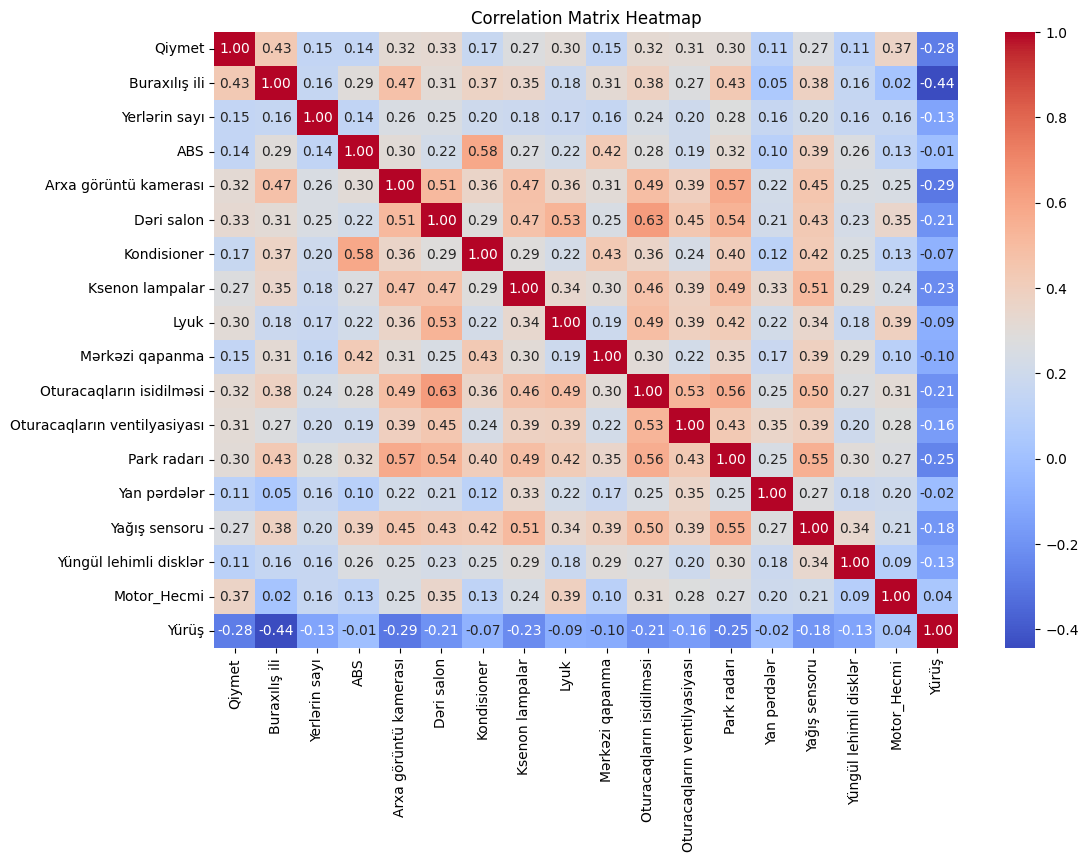

In [36]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = data[numeric_cols].corr()

target_corr = corr_matrix["Qiymet"].sort_values(ascending=False)
print("Correlation with Qiymet:\n", target_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti', 'Extra', 'Yanacaq_Novu', 'Brand_Model']


In [38]:
import pandas as pd

#Frequency Encoding for 'Brand_Model'
freq_encoding = data['Brand_Model'].value_counts().to_dict()
data['Brand_Model_FE'] = data['Brand_Model'].map(freq_encoding)

# One-Hot Encoding for nominal categorical columns
nominal_cols = ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Yanacaq_Novu']
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Label Encoding for 'Vəziyyəti' (ordinal-type categorical feature)
data['Vəziyyəti'] = data['Vəziyyəti'].map({
    'Vuruğu yoxdur, rənglənməyib': 3,
    'Vuruğu yoxdur, rənglənib': 2,
    'Vuruğu var, rənglənib': 1,
    'Vuruğu var, rənglənməyib': 0
})

# Drop original 'Brand_Model' column
data.drop(columns=['Brand_Model'], inplace=True)


print(f"Data shape after encoding: {data.shape}")

Data shape after encoding: (9972, 66)


In [39]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Extra,Yerlərin sayı,ABS,Arxa görüntü kamerası,Dəri salon,Kondisioner,Ksenon lampalar,...,Sürətlər qutusu_Robotlaşdırılmış,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown
0,13500.0,2000,2,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
1,39950.0,2023,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,False,True,False,False,True,False,False,False
2,33200.0,2013,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,True,False,False,False,False,False
3,17000.0,2015,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
4,61200.0,2022,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9996,166600.0,2019,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,False
9997,9800.0,2007,3,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",5,1.0,1.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,False,False
9998,17800.0,2007,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,True,False,False,False,False,False


In [40]:
data['Buraxılış ili'].value_counts()

,count
Buraxılış ili,
2012,689
2008,682
2013,676
2014,602
2022,563
...,...
1938,1
1970,1
1957,1


In [41]:
import datetime

current_year = datetime.datetime.now().year
data["Car_Age"] = current_year - data["Buraxılış ili"]

In [42]:
data = data[data["Car_Age"] <= 50]

In [43]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Extra,Yerlərin sayı,ABS,Arxa görüntü kamerası,Dəri salon,Kondisioner,Ksenon lampalar,...,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown,Car_Age
0,13500.0,2000,2,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,25
1,39950.0,2023,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,True,False,False,True,False,False,False,2
2,33200.0,2013,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7,1.0,1.0,1.0,1.0,1.0,...,False,False,True,True,False,False,False,False,False,12
3,17000.0,2015,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,10
4,61200.0,2022,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,9
9996,166600.0,2019,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,1.0,1.0,1.0,1.0,...,False,True,False,False,False,False,False,False,False,6
9997,9800.0,2007,3,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",5,1.0,1.0,0.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,18
9998,17800.0,2007,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,True,False,False,False,False,False,18


In [44]:
data.drop(columns=["Buraxılış ili"], inplace=True)

<ipython-input-44-944198688988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Buraxılış ili"], inplace=True)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Qiymet                            9951 non-null   float64
 1   Vəziyyəti                         9951 non-null   int64  
 2   Extra                             9202 non-null   object 
 3   Yerlərin sayı                     9951 non-null   int64  
 4   ABS                               9202 non-null   float64
 5   Arxa görüntü kamerası             9202 non-null   float64
 6   Dəri salon                        9202 non-null   float64
 7   Kondisioner                       9202 non-null   float64
 8   Ksenon lampalar                   9202 non-null   float64
 9   Lyuk                              9202 non-null   float64
 10  Mərkəzi qapanma                   9202 non-null   float64
 11  Oturacaqların isidilməsi          9202 non-null   float64
 12  Oturacaqlar

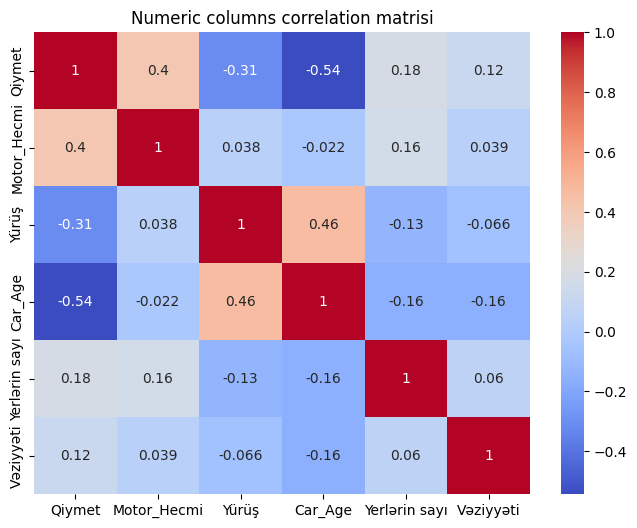

In [64]:
num_cols = ["Qiymet", "Motor_Hecmi", "Yürüş", "Car_Age", "Yerlərin sayı", "Vəziyyəti"]
corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric columns correlation matrisi")
plt.show()


In [48]:
corr_with_target = data.select_dtypes(include='number').corr()["Qiymet"].sort_values(ascending=False)
print(corr_with_target)

Qiymet                          1.000000
Motor_Hecmi                     0.381790
Dəri salon                      0.338311
Oturacaqların isidilməsi        0.337723
Arxa görüntü kamerası           0.335348
Oturacaqların ventilyasiyası    0.322863
Park radarı                     0.319766
Lyuk                            0.317138
Yağış sensoru                   0.282792
Ksenon lampalar                 0.281083
Kondisioner                     0.184922
ABS                             0.161269
Mərkəzi qapanma                 0.160918
Yerlərin sayı                   0.153054
Yüngül lehimli disklər          0.124688
Yan pərdələr                    0.118187
Vəziyyəti                       0.110141
Brand_Model_FE                 -0.151352
Yürüş                          -0.289426
Car_Age                        -0.493687
Name: Qiymet, dtype: float64


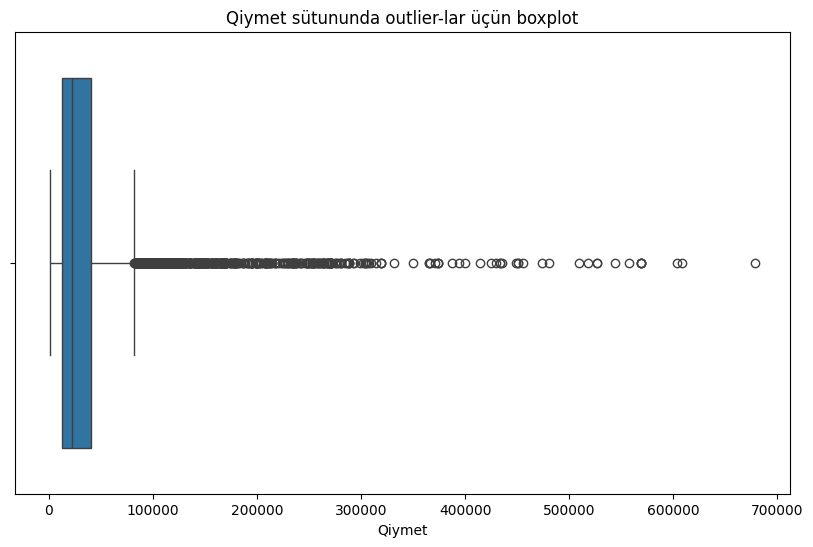

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Qiymet'])
plt.title('Qiymet sütununda outlier-lar üçün boxplot')
plt.show()

In [50]:
from scipy import stats

z_scores = stats.zscore(data['Qiymet'])
outliers_z = data[(np.abs(z_scores) > 3)]
print(f"Z-score ilə tapılan outlier sayi: {outliers_z.shape[0]}")

Z-score ilə tapılan outlier sayi: 201


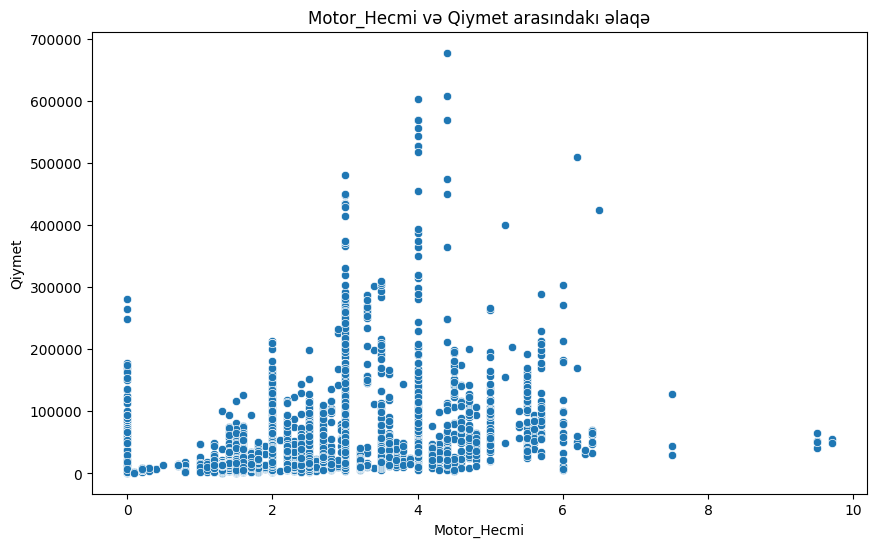

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Motor_Hecmi'], y=data['Qiymet'])
plt.title('Motor_Hecmi və Qiymet arasındakı əlaqə')
plt.show()

In [52]:
from scipy.spatial import distance

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']
data_features = data[features]
data_features = data_features.dropna()

m_dist = mahalanobis(x=data_features, data=data_features)
threshold = np.percentile(m_dist, 99)  # üst 1% outlier kimi qəbul edək
outliers_multi = data_features[m_dist > threshold]
print(f"Çoxölçülü outlier sayi: {outliers_multi.shape[0]}")

Çoxölçülü outlier sayi: 100


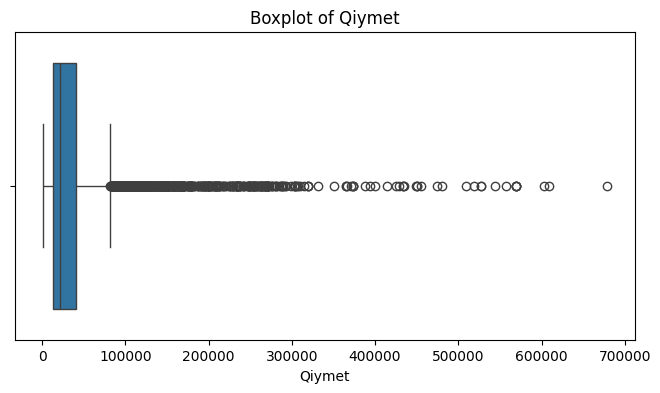

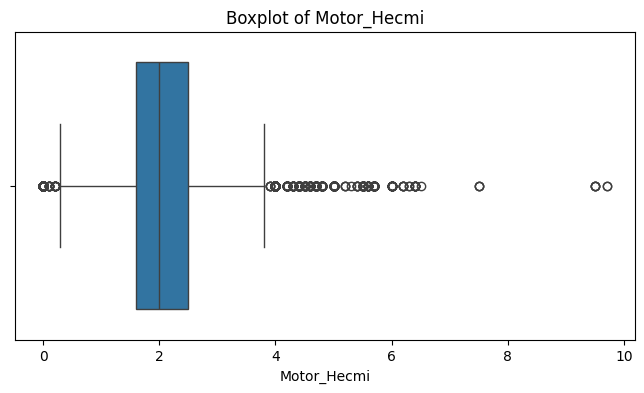

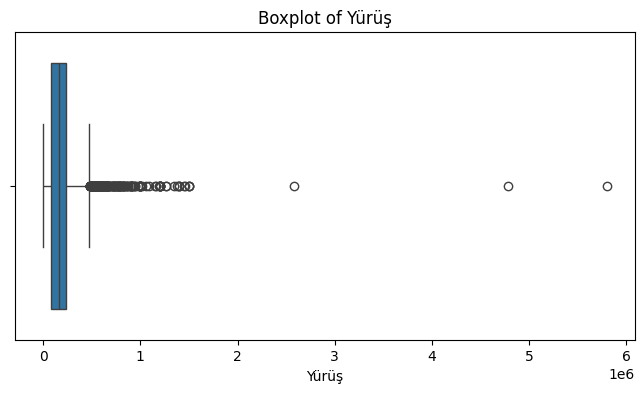

In [53]:
features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [54]:
data = data.copy()

lower_limit = data['Qiymet'].quantile(0.01)
upper_limit = data['Qiymet'].quantile(0.99)

data.loc[:, 'Qiymet'] = data['Qiymet'].clip(lower_limit, upper_limit)

print(data['Qiymet'].describe())

count      9951.000000
mean      35167.291930
std       40858.801654
min        2800.000000
25%       12700.000000
50%       21900.000000
75%       40460.000000
max      253640.000000
Name: Qiymet, dtype: float64


In [55]:
print("Old min:", data['Qiymet'].min())
print("Old max:", data['Qiymet'].max())

Old min: 2800.0
Old max: 253640.0


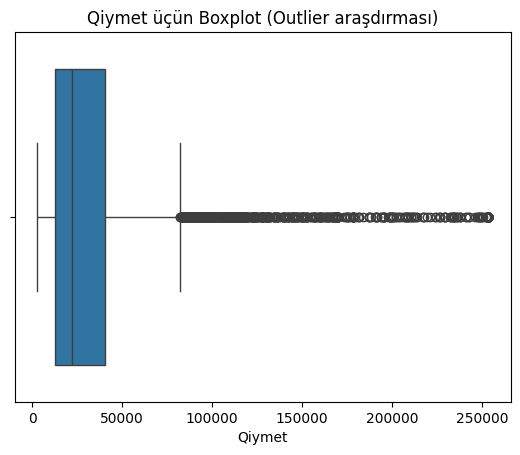

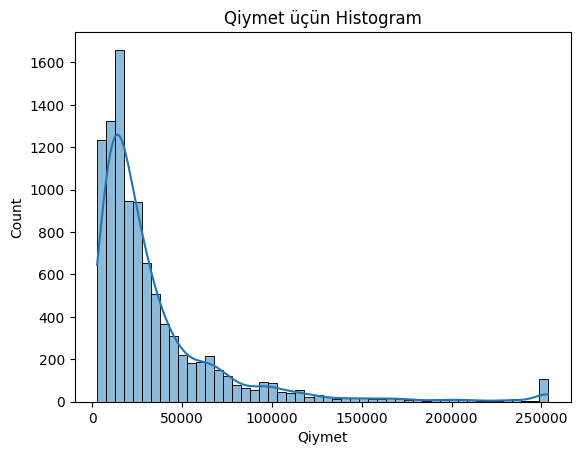

In [56]:
sns.boxplot(x=data['Qiymet'])
plt.title("Qiymet üçün Boxplot (Outlier araşdırması)")
plt.show()

sns.histplot(data['Qiymet'], bins=50, kde=True)
plt.title("Qiymet üçün Histogram")
plt.show()

In [57]:
print(data['Qiymet'].quantile(0.99))  # 99% qiymət bundan aşağıdır

253385.0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Qiymet                            9951 non-null   float64
 1   Vəziyyəti                         9951 non-null   int64  
 2   Extra                             9202 non-null   object 
 3   Yerlərin sayı                     9951 non-null   int64  
 4   ABS                               9202 non-null   float64
 5   Arxa görüntü kamerası             9202 non-null   float64
 6   Dəri salon                        9202 non-null   float64
 7   Kondisioner                       9202 non-null   float64
 8   Ksenon lampalar                   9202 non-null   float64
 9   Lyuk                              9202 non-null   float64
 10  Mərkəzi qapanma                   9202 non-null   float64
 11  Oturacaqların isidilməsi          9202 non-null   float64
 12  Oturacaqlar

In [59]:
extra_columns = [
    'ABS', 'Dəri salon', 'Kondisioner', 'Lyuk',
    'Oturacaqların isidilməsi', 'Oturacaqların ventilyasiyası',
    'Park radarı', 'Yan pərdələr', 'Yağış sensoru',
    'Yüngül lehimli disklər', 'Arxa görüntü kamerası'
]

data[extra_columns] = data[extra_columns].fillna(0)
data.drop('Extra', axis=1, inplace=True)

In [60]:
data.isnull().sum()

,0
Qiymet,0
Vəziyyəti,0
Yerlərin sayı,0
ABS,0
Arxa görüntü kamerası,0
...,...
Yanacaq_Novu_Hibrid,0
Yanacaq_Novu_Plug-in Hibrid,0
Yanacaq_Novu_Qaz,0
Yanacaq_Novu_unknown,0


Modelling

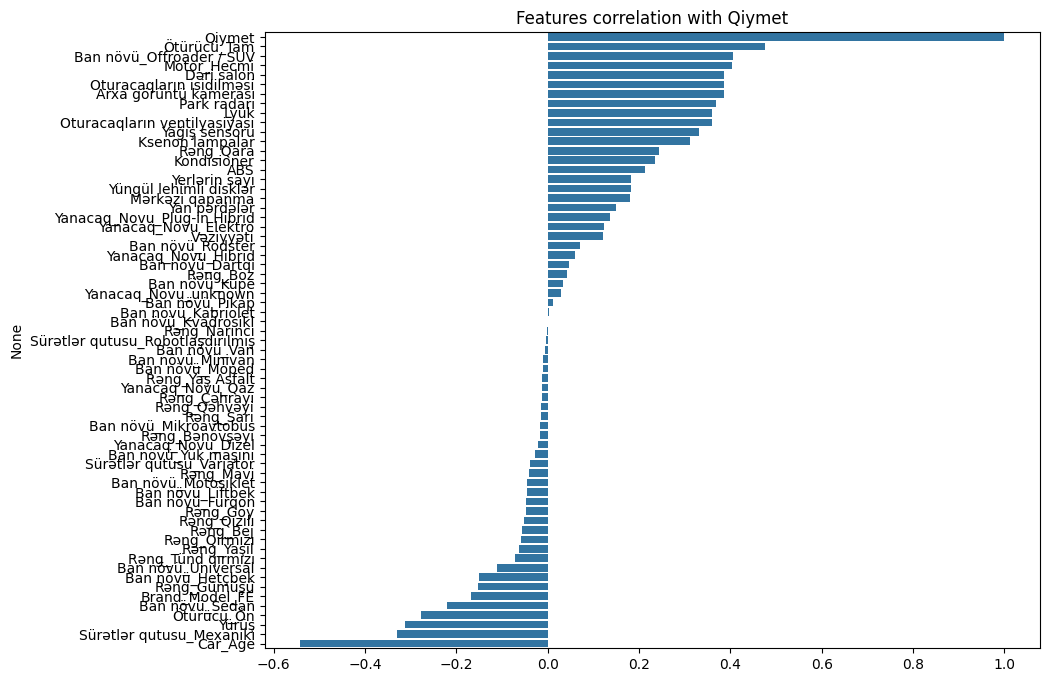

In [61]:

corr_matrix = data.corr()
corr_target = corr_matrix['Qiymet'].sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title('Features correlation with Qiymet')
plt.show()

In [62]:
selected_features = corr_target[abs(corr_target) > 0.1].index.tolist()
selected_features.remove('Qiymet')

print(selected_features)

['Ötürücü_Tam', 'Ban növü_Offroader / SUV', 'Motor_Hecmi', 'Dəri salon', 'Oturacaqların isidilməsi', 'Arxa görüntü kamerası', 'Park radarı', 'Lyuk', 'Oturacaqların ventilyasiyası', 'Yağış sensoru', 'Ksenon lampalar', 'Rəng_Qara', 'Kondisioner', 'ABS', 'Yerlərin sayı', 'Yüngül lehimli disklər', 'Mərkəzi qapanma', 'Yan pərdələr', 'Yanacaq_Novu_Plug-in Hibrid', 'Yanacaq_Novu_Elektro', 'Vəziyyəti', 'Ban növü_Universal', 'Ban növü_Hetçbek', 'Rəng_Gümüşü', 'Brand_Model_FE', 'Ban növü_Sedan', 'Ötürücü_Ön', 'Yürüş', 'Sürətlər qutusu_Mexaniki', 'Car_Age']


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[selected_features].fillna(0)
y = data['Qiymet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 14127.989597349986


In [67]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

r2 = r2_score(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"R2 Score: {r2:.2f}")

MAPE: 17.22%
R2 Score: 0.89


In [68]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [70]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"CatBoost MAPE: {mape*100:.2f}%")
print(f"CatBoost R2 Score: {r2:.2f}")

CatBoost MAPE: 18.74%
CatBoost R2 Score: 0.92


In [71]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score


cat = CatBoostRegressor(verbose=0, random_state=42)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200]
}

grid_search = GridSearchCV(cat, param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
MAPE: 0.2001696434208133
R2 Score: 0.9103015570449204


In [72]:
comparison = pd.DataFrame({'Real Price': y_test.values, 'Predicted Price': y_pred})
print(comparison.head())

   Real Price  Predicted Price
0     71500.0    100447.664185
1      8600.0     11715.532179
2     12600.0     12510.779570
3     62050.0     62531.520449
4     11700.0     13462.905403


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

MAE: 6013.76
MSE: 169800166.14
RMSE: 13030.74
R-squared: 0.9103


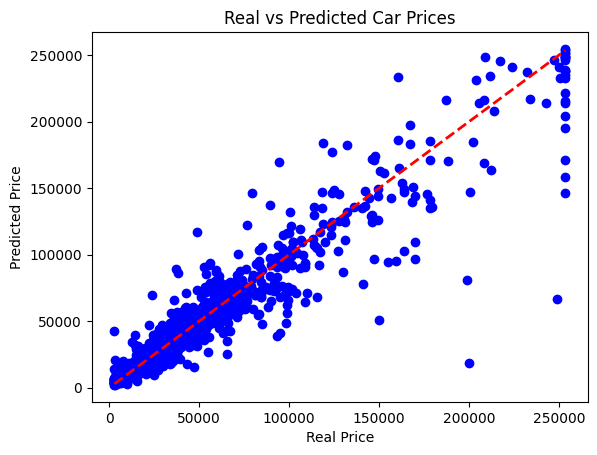

In [74]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs Predicted Car Prices')
plt.show()

In [75]:
# Fərqləri hesablayaq
errors = np.abs(y_test - y_pred)

# Ən çox fərq olan 10 müşahidə
outliers_df = pd.DataFrame({
    'Real Price': y_test,
    'Predicted Price': y_pred,
    'Error': errors
}).sort_values(by='Error', ascending=False).head(10)

print(outliers_df)

      Real Price  Predicted Price          Error
6702    249143.5     66798.115774  182345.384226
8526    200000.0     18741.574627  181258.425373
7880    198900.0     80983.442730  117916.557270
9016    253640.0    146457.963775  107182.036225
9175    150000.0     50643.422530   99356.577470
3500    253640.0    158442.696849   95197.303151
703     253640.0    171067.250878   82572.749122
4780     94421.4    169948.434662   75527.034662
8746    170000.0     96337.777240   73662.222760
3088    160650.0    233747.262425   73097.262425


In [76]:
pip install shap

In [79]:
X_train.dtypes

,0
Ötürücü_Tam,int64
Ban növü_Offroader / SUV,int64
Motor_Hecmi,float64
Dəri salon,float64
Oturacaqların isidilməsi,float64
Arxa görüntü kamerası,float64
Park radarı,float64
Lyuk,float64
Oturacaqların ventilyasiyası,float64
Yağış sensoru,float64


In [80]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

100%|===================| 1988/1991 [03:32<00:00]       

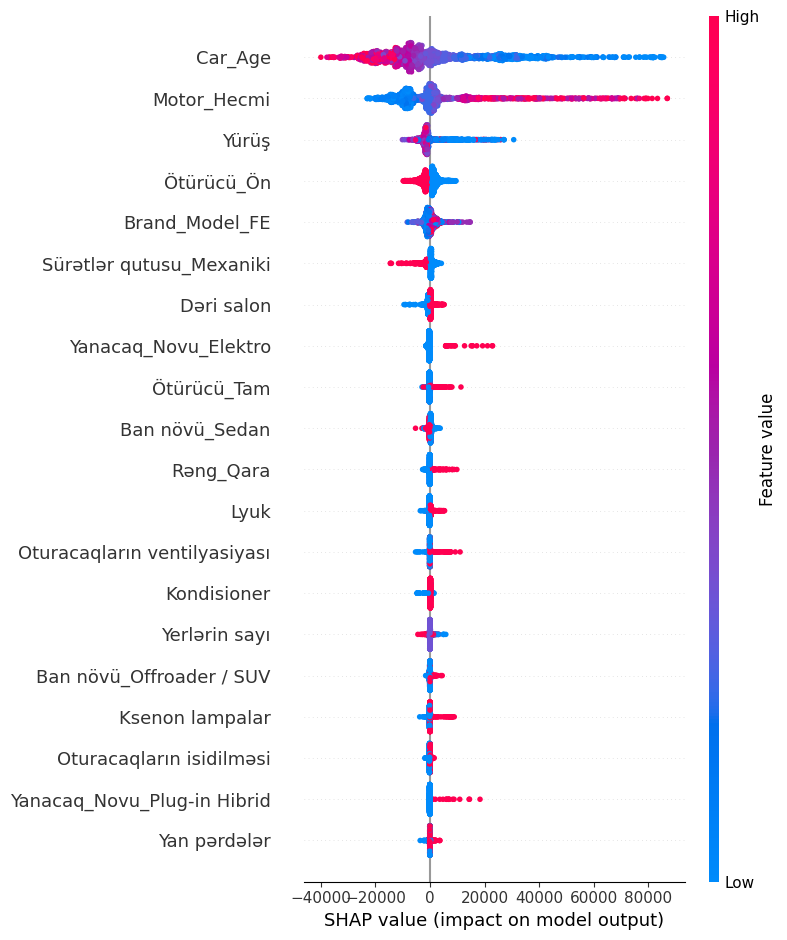

In [81]:
import shap

explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)

In [82]:
import pickle

In [84]:

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)


with open("shap_values.pkl", "wb") as f:
    pickle.dump(shap_values, f)


with open("explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)


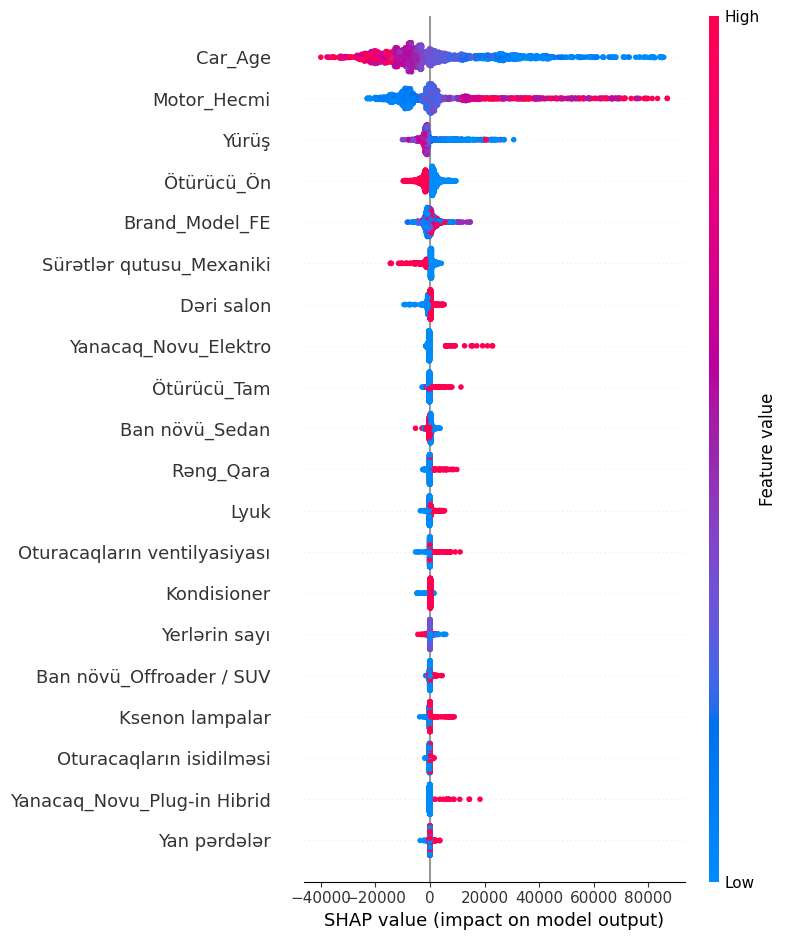

In [86]:

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)  # show=False vacibdir, yoxsa plt.savefig işləmir
plt.tight_layout()
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")
plt.show()


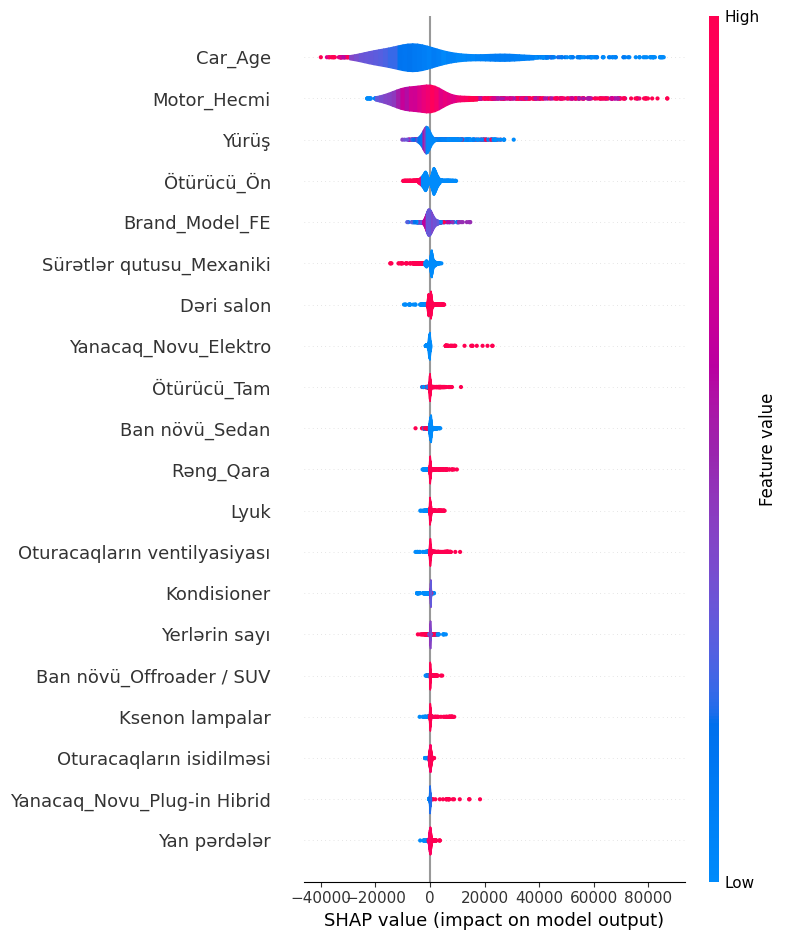

In [87]:
shap.summary_plot(shap_values, X_test, plot_type="violin", show=False)
plt.tight_layout()
plt.savefig("shap_violin_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [102]:
def analyze_numerical_feature_distributions(data, features):

    num_features = len(features)

    fig, axes = plt.subplots(num_features, 2, figsize=(10, num_features * 4))
    fig.suptitle('Numeric features histogram nd boxplot', y=1.02)

    for i, feature in enumerate(features):

        sns.histplot(data[feature], kde=True, ax=axes[i, 0] if num_features > 1 else axes[0])
        axes[i, 0].set_title(f'{feature} -Histogram')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Frequency')


        sns.boxplot(x=data[feature], ax=axes[i, 1] if num_features > 1 else axes[1])
        axes[i, 1].set_title(f'{feature} - Outliers (Boxplot)')
        axes[i, 1].set_xlabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


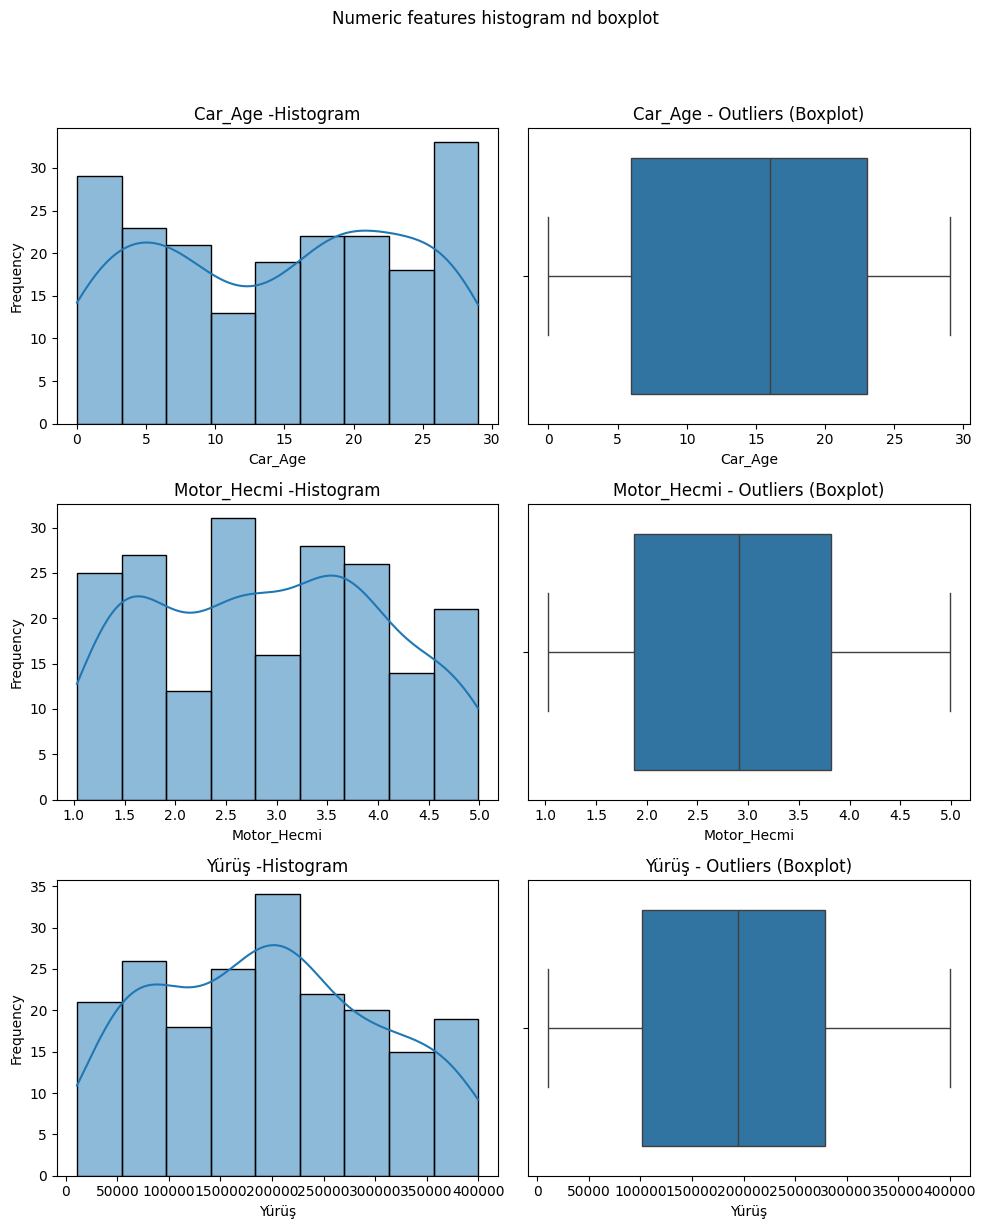

In [103]:
analyze_numerical_feature_distributions(X_test, ['Car_Age', 'Motor_Hecmi', 'Yürüş'])